In [ ]:
# first step and last step here
#https://colab.research.google.com/drive/1v0WBqJ2IkOH_v9HQfiV2DxZK_f9oXvAV?usp=sharing

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/LABELS.csv')

In [2]:
x = df['person'].to_list()

In [3]:
d = {}
for i in x:
   d[i] = int(0)

for i in x:
    d[i] = d[i]+1;


In [4]:
d

{'apurbo': 77,
 'badhon': 79,
 'bijly': 75,
 'lovely': 67,
 'manik': 75,
 'onob': 61,
 'opu': 83,
 'pandey': 67,
 'pinky': 68,
 'rabbi': 80,
 'raihan': 54,
 'rojoni': 71,
 'roktim': 71,
 'rubina': 64,
 'rumki': 57,
 'rupban': 75,
 'rupom': 77,
 'saddam': 55,
 'sagor': 54,
 'salma': 72,
 'salman': 70,
 'sathi': 64,
 'shaed': 77,
 'sharukh': 72,
 'sweety': 63}

In [5]:
len(d)

25

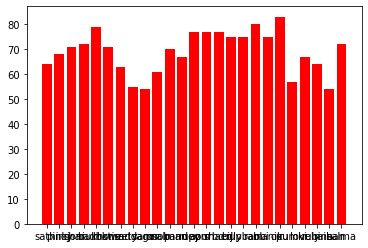

In [6]:
import matplotlib.pyplot as plt
plt.bar(list(d.keys()), d.values(), color='r')
plt.show()

In [7]:
from tensorflow import keras
import tensorflow as tf

In [8]:
model = keras.Sequential()
model.add(keras.layers.Convolution2D(32, (11, 11), activation='relu', name='C1', input_shape=(152, 152, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=3, strides=2, padding='same', name='M2'))
model.add(keras.layers.Convolution2D(16, (9, 9), activation='relu', name='C3'))
model.add(keras.layers.LocallyConnected2D(16, (9, 9), activation='relu', name='L4'))
model.add(keras.layers.LocallyConnected2D(16, (7, 7), strides=2, activation='relu', name='L5') )
model.add(keras.layers.LocallyConnected2D(16, (5, 5), activation='relu', name='L6'))
model.add(keras.layers.Flatten(name='F0'))
model.add(keras.layers.Dense(4096, activation='relu', name='F7'))
model.add(keras.layers.Dropout(rate=0.5, name='D0'))
model.add(keras.layers.Dense(8631, activation='softmax', name='F8'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 142, 142, 32)      11648     
_________________________________________________________________
M2 (MaxPooling2D)            (None, 71, 71, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 63, 63, 16)        41488     
_________________________________________________________________
L4 (LocallyConnected2D)      (None, 55, 55, 16)        62774800  
_________________________________________________________________
L5 (LocallyConnected2D)      (None, 25, 25, 16)        7850000   
_________________________________________________________________
L6 (LocallyConnected2D)      (None, 21, 21, 16)        2829456   
_________________________________________________________________
F0 (Flatten)                 (None, 7056)              0

In [ ]:
# import urllib.request
# urllib.request.urlretrieve('https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip','VGGFace2_DeepFace_weights_val-0.9034.h5.zip')

In [ ]:
# !unzip '/content/VGGFace2_DeepFace_weights_val-0.9034.h5.zip'

In [ ]:
# model.load_weights("/content/VGGFace2_DeepFace_weights_val-0.9034.h5")

In [10]:
model.trainable = True

In [11]:
temp = keras.Model(inputs=model.layers[0].input, outputs=model.layers[-3].output)

In [12]:
temp.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1_input (InputLayer)        [(None, 152, 152, 3)]     0         
_________________________________________________________________
C1 (Conv2D)                  (None, 142, 142, 32)      11648     
_________________________________________________________________
M2 (MaxPooling2D)            (None, 71, 71, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 63, 63, 16)        41488     
_________________________________________________________________
L4 (LocallyConnected2D)      (None, 55, 55, 16)        62774800  
_________________________________________________________________
L5 (LocallyConnected2D)      (None, 25, 25, 16)        7850000   
_________________________________________________________________
L6 (LocallyConnected2D)      (None, 21, 21, 16)       

In [13]:
deepface_model = keras.Sequential()
deepface_model.add(temp)
deepface_model.add(keras.layers.Dropout(rate=0.5, name='D1'))
deepface_model.add(keras.layers.Dense(25, activation='softmax', name='F9'))

In [ ]:
deepface_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 4096)              102412864 
_________________________________________________________________
D1 (Dropout)                 (None, 4096)              0         
_________________________________________________________________
F9 (Dense)                   (None, 25)                102425    
Total params: 102,515,289
Trainable params: 102,515,289
Non-trainable params: 0
_________________________________________________________________


In [14]:

optimizer = keras.optimizers.Adam(learning_rate=.000008)
deepface_model.compile(
    loss= 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']
)

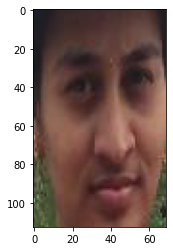

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mimage
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

x = mimage.imread('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/traincrop/1.jpg')
plt.imshow(x);
plt.show()

filename = df['filename'].tolist()
PATH = '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/traincrop/'
x_train_img = []
for name in filename:
    img = mimage.imread(PATH+name)
    img = cv2.resize(img,(152,152))
    img = img.astype(np.float32)
    img/=255.0
    x_train_img.append(img)
    



In [16]:
x_train_img = np.array(x_train_img)

In [17]:
persons = df['person'].tolist()
d  = {}
coun = 0
for i in persons:
    if i not in d:
        d[i] = coun
        coun+=1

y_train_label = np.array([d[i] for i in persons])
y_train_label = keras.utils.to_categorical(y_train_label,num_classes=25)
y_train_label.shape

(1728, 25)

In [18]:
datagen = ImageDataGenerator(horizontal_flip=True,rotation_range=5,width_shift_range=.1,height_shift_range=.1)
it = datagen.flow(x_train_img, y_train_label)

In [19]:
tf.config.experimental_run_functions_eagerly(True)


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
x_train_img[0].dtype

dtype('float32')

In [26]:
itx = datagen.flow(np.array([x_train_img[15]]),np.array([y_train_label[15]]))

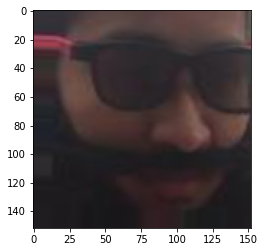

0


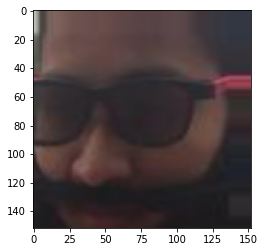

0


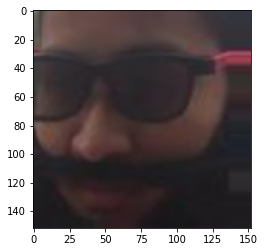

0


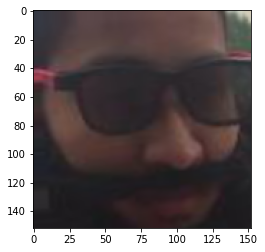

0


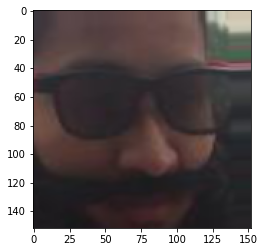

0


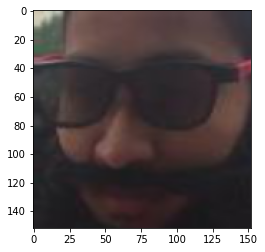

0


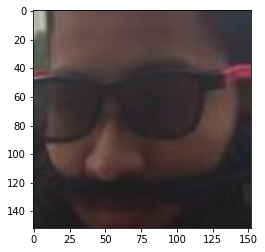

0


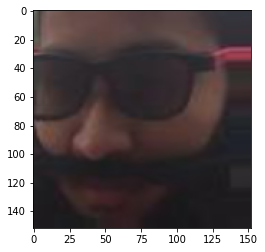

0


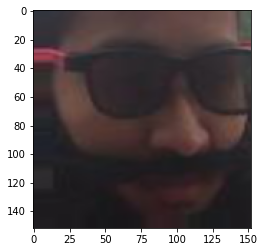

0


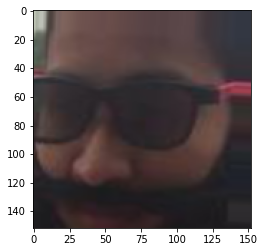

0


In [27]:
for i in range(10):
    x,y = itx.next()
    plt.imshow(x[0])
    plt.show()
    print(np.argmax(y[0]))

In [ ]:
deepface_model = keras.models.load_model('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/deepfaceDFI2.h5')

In [ ]:
history  = deepface_model.fit(it,steps_per_epoch=54,verbose=1,epochs=60,batch_size=32)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/60
54/54 [==============================] - 153s 3s/step - loss: 0.0575 - accuracy: 0.9826
Epoch 2/60
54/54 [==============================] - 153s 3s/step - loss: 0.0576 - accuracy: 0.9844
Epoch 3/60
54/54 [==============================] - 151s 3s/step - loss: 0.0647 - accuracy: 0.9809
Epoch 4/60
54/54 [==============================] - 153s 3s/step - loss: 0.0588 - accuracy: 0.9850
Epoch 5/60
54/54 [==============================] - 152s 3s/step - loss: 0.0669 - accuracy: 0.9844
Epoch 6/60
54/54 [==============================] - 153s 3s/step - loss: 0.0592 - accuracy: 0.9832
Epoch 7/60
54/54 [==============================] - 152s 3s/step - loss: 0.0598 - accuracy: 0.9832
Epoch 8/60
54/54 [==============================] - 154s 3s/step - loss: 0.0583 - accuracy: 0.9832
Epoch 9/60
54/54 [==============================] - 152s 3s/step - loss: 0.0468 - accuracy: 0.9884
Epoch 10/60
54/54 [==============================] - 153s 3s/step - loss: 0.0600 - accuracy: 0.9815
Epoch 11/

In [ ]:
force stop

NameError: ignored

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import pickle
with open('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/trainHistoryDict4', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [ ]:
deepface_model.save('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/deepfaceDFI2.h5')

In [ ]:
p = deepface_model.predict(np.array([x]))

In [ ]:
p[0].argmax(axis=0)

NameError: ignored